In [1]:
def writer(input):
    return "an essay"

In [2]:
revisions = 0

def reviser(input):
  global revisions
  revisions = revisions + 1
  print(f"revision number {revisions}")
  return input + " revisions"

In [3]:
def checker(input):
  if revisions >= 3:
    return "good"
  else:
    return "feedback"

In [4]:
from langgraph.graph import Graph, START, END

graph = Graph()
graph.add_node("writer", writer)
graph.add_node("reviser", reviser)
graph.add_node("checker", checker)

In [5]:
graph.add_edge(START, "writer")
graph.add_edge("writer", "checker")
graph.add_edge("reviser", "checker")

In [6]:
def check(input):
    if input == "good":
        return "pass"
    else:
        return "fail"

In [7]:
graph.add_conditional_edges(
  "checker", 
  check,
  {
    "fail": "reviser", 
    "pass": END # __end__
  }
)

In [9]:
app = graph.compile()

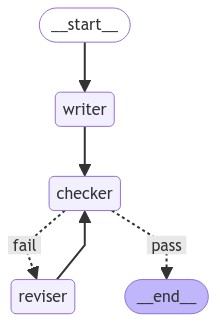

In [10]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))